In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


Pre-processing: Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [5]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
scaled_y.reshape(20, )

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Splitting into independent & dependent variables

testing

In [8]:
np.ones(2)

array([1., 1.])

In [9]:
w = np.ones(shape=(2))
w

array([1., 1.])

In [10]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [11]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

# Batch GD

In [12]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1] # numpy array with 1 row and columns equal to number of features [number_of_features = 2, i.e. (area, bedroom)]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b # w1 * area + w2 * bedrooms + b
        
        w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_pred))
        b_grad = -(2 / total_samples) * np.sum(y_true - y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = (np.square(y_true - y_pred)).mean() # MSE (mean squared error)
        
        if i % 10 == 0:
            # print('epoch:', i, 'w:', w, 'b:', b)
            
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [13]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

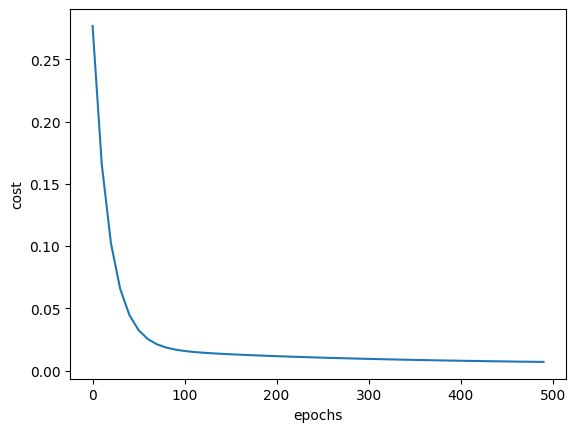

In [14]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

Prediction func.

In [15]:
sx.transform([[2600, 4]])

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [16]:
sy.inverse_transform([[1, 0.5, 0]])

array([[167. ,  99.5,  32. ]])

In [17]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [18]:
print(predict(1000, 2, w, b))

print(predict(1500, 3, w, b))

30.253094462442363
69.47860785714694


c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


testing

In [19]:
import random

random.randint(0, 6)

4

# Stochastic GD

In [20]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w, sample_X.T) + b
        
        w_grad = -(2 / total_samples) * (sample_X.T.dot(sample_y - y_pred))
        b_grad = -(2 / total_samples) * (sample_y - y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = (np.square(sample_y - y_pred)).mean()
        
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [21]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70568919, 0.67370376]), -0.2281630271631727, 0.002465335634276736)

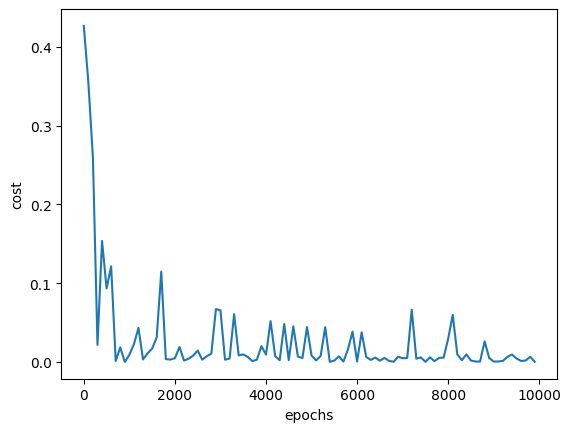

In [22]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [23]:
print(predict(2600, 4, w_sgd, b_sgd))
print(predict(1000, 2, w_sgd, b_sgd))
print(predict(1500, 3, w_sgd, b_sgd))

128.54238343771337
30.505702722281328
69.66872859579416


c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


testing

# Mini-Batch GD

* In Batch, we adjust weights after going through all samples, but in mini batch we do after every m samples. (where m is batch size and it is 0 < m < n, where n is total number of samples)

[0.71006125 0.67800616] -0.23356046790105006 0.007019904981156036


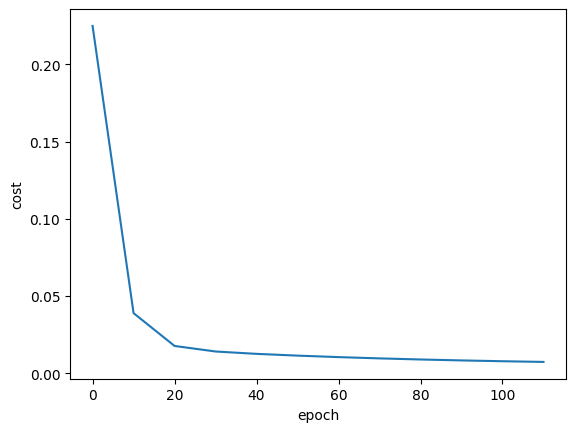

In [24]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01, batch_size=5):
    
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # Shuffle data to create random mini-batches
        indices = np.arange(total_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y_true = y_true[indices]
        
        # Iterate over each mini-batch
        for j in range(0, total_samples, batch_size):
            # Select the mini-batch samples
            X_batch = X[j:j + batch_size]
            y_batch = y_true[j:j + batch_size]
            
            # Predict y using current weights and bias
            y_pred = np.dot(w, X_batch.T) + b
            
            # Calculate gradients for weights and bias
            w_grad = -(2 / X_batch.shape[0]) * (X_batch.T.dot(y_batch - y_pred))
            b_grad = -(2 / X_batch.shape[0]) * np.sum(y_batch - y_pred)
            
            # Update weights and bias
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
        
        # Compute the cost (mean squared error) after each epoch
        y_pred_epoch = np.dot(w, X.T) + b
        cost = (np.square(y_true - y_pred_epoch)).mean()
        
        # Track cost and epochs at intervals (every 10 epochs here)
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
print(w_mgd, b_mgd, cost_mgd)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mgd, cost_list_mgd)

In [28]:
print(predict(2600, 4, w_mgd, b_mgd))
print(predict(1000, 2, w_mgd, b_mgd))
print(predict(1500, 3, w_mgd, b_mgd))

128.61569643262246
29.962959768673215
69.37295540231803


c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[0.71020975 0.67817921] -0.23330695606617935 0.0047949035033470295


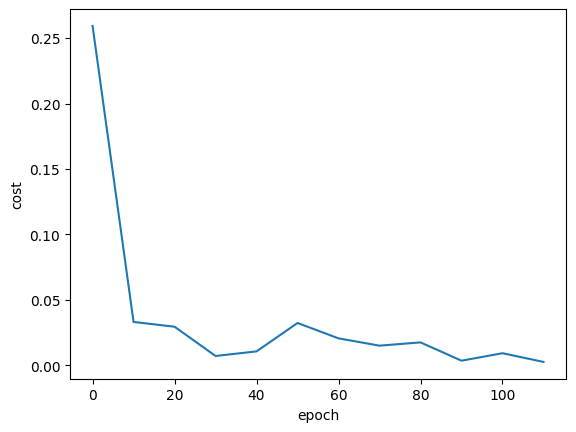

In [ ]:
def mini_batch_gd(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    # num_batches = int(total_samples / batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j + batch_size]
            yj = y_tmp[j:j + batch_size]
            
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_predicted))
            b_grad = -(2 / len(Xj)) * np.sum(yj - y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj - y_predicted)) # MSE (Mean Squared Error)
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gd(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
print(w_mbgd, b_mbgd, cost_mbgd)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [29]:
print(predict(2600, 4, w_mbgd, b_mbgd))
print(predict(1000, 2, w_mbgd, b_mbgd))
print(predict(1500, 3, w_mbgd, b_mbgd))

128.67988491379148
30.004406952739473
69.4236994538393


c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
